In [3]:
import pandas as pd


In [101]:
df = pd.read_csv('Billionaires.csv')


In [7]:
df.head()

,Rank,Name,Net Worth,Age,Country | Territory,Source,Industry
0,1,Bernard Arnault & family,$211 B,74.0,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51.0,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59.0,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78.0,United States,Oracle,Technology
4,5,Warren Buffett,$106 B,92.0,United States,Berkshire Hathaway,Finance & Investments


In [ ]:
import matplotlib.pyplot as plt

###  Агрегированная статистика

Какой средний возраст билионеров?

In [8]:
df["Age"].mean()

65.1347049689441

Каков средний возраст и состояние билионеров?


In [65]:
df['Net Worth'] = df['Net Worth'].replace({'B': '', '\$': ''}, regex=True)

df['Net Worth'] = pd.to_numeric(df['Net Worth'])

df[["Age", "Net Worth"]].median()




Age          65.0
Net Worth     2.3
dtype: float64

Функция pandas.DataFrame.describe рассчитывает параметры описательной статистики

“std” - это сокращение от “стандартное отклонение” (standard deviation), которое является мерой разброса значений в наборе данных. Стандартное отклонение показывает, насколько близко значения группируются вокруг среднего (или ожидаемого) значения.

In [66]:
df[["Age", "Net Worth"]].describe()

,Age,Net Worth
count,2576.000000,2640.000000
mean,65.134705,4.623788
std,13.258245,9.834241
min,18.000000,1.000000
25%,56.000000,1.500000
50%,65.000000,2.300000
75%,75.000000,4.200000
max,101.000000,211.000000


Вместо предопределенной статистики можно определить конкретные комбинации агрегированной статистики для заданных столбцов с помощью DataFrame.agg()метода:

In [67]:

df.agg(
    {
        "Age": ["min", "max", "median"],
        "Net Worth": ["min", "max", "median", "mean"],
    }
)

,Age,Net Worth
min,18.0,1.000000
max,101.0,211.000000
median,65.0,2.300000
mean,NaN,4.623788


Процентиль — мера, в которой процентное значение общих значений равно этой мере или меньше ее.


In [68]:
df["Age"].describe(percentiles=[0.05, 0.25, 0.75, 0.95])

count    2576.000000
mean       65.134705
std        13.258245
min        18.000000
5%         43.000000
25%        56.000000
50%        65.000000
75%        75.000000
95%        87.000000
max       101.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

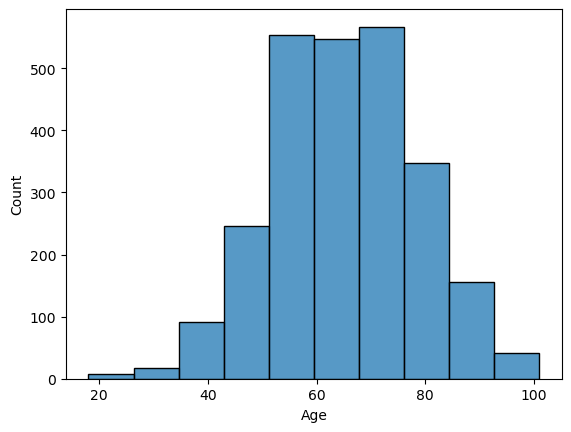

In [116]:
import seaborn as sns
sns.histplot(data=df["Age"],bins=10)


# sns.boxplot(x=df["Industry"])

Среднее состояние по странам

In [91]:

pd.set_option('display.max_rows', 10)
df[["Net Worth", "Country | Territory"]].groupby("Country | Territory").mean().sort_values("Net Worth", ascending=False)



,Net Worth
Country | Territory,
France,13.720930
Mexico,12.064286
Nigeria,9.500000
Eswatini (Swaziland),6.500000
Austria,6.427273
...,...
Macau,1.300000
Hungary,1.300000
Armenia,1.200000


среднее состояние по странам и отраслям

In [96]:

pd.set_option('display.max_rows', None)
df.groupby(["Country | Territory", "Industry"])["Net Worth"].mean()



Country | Territory   Industry                  
Algeria               Food & Beverage                4.600000
Argentina             Diversified                    1.900000
                      Energy                         2.350000
                      Real Estate                    1.300000
                      Technology                     4.900000
Armenia               Finance & Investments          1.200000
Australia             Automotive                     3.500000
                      Diversified                    4.100000
                      Energy                         1.600000
                      Fashion & Retail               1.757143
                      Finance & Investments          2.880000
                      Food & Beverage                2.700000
                      Logistics                      3.200000
                      Manufacturing                  4.300000
                      Metals & Mining                6.611111
                     